<a href="https://colab.research.google.com/github/AlejandroNunezArroyo/ARTIFICIAL-VISION/blob/main/Tutorial_1_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Welcome to the first tutorial! 🎉

In this tutorial, you'll see the basics of Image Processing and Colab. This platform lets us program and use Jupyter Notebooks on the cloud, which is quite useful when one does not have the latest laptop/computer to program computer vision algorithms. 

For those who have never worked with Jupyter Notebooks: Basically, this tool consists of multiple cells that can contain parts of a python program. When positioning your mouse on the bottom of this cell, you'll see that two buttons come up. The *+ code* will let you create a cell that can contain python code. On the other hand, *+ text* will let you create descriptions and text like this. 

You can also visit __[The Colab Base Tutorial](https://colab.research.google.com/notebooks/intro.ipynb)__ if you want to see further functionalities and tutorials on Colab. 

##1.1 Importing the libraries
As you already now, libraries are collections of functions and resources that let us focus on the important tasks, instead of focusing on reinventing the wheel. The following libraries will be the base for this course: 


In [9]:
# Numpy is the core library for computing in Python. It provides a 
# high-performance multidimensional array object, and tools for working with 
# these arrays. For example, a list of lists as you describe, in Python, would 
# take at least 20 MB or so, while a NumPy 3D array with single-precision floats
# in the cells would fit in 4 MB. 
import numpy as np

# Basic module to display images in Python programs. The %matplotlib inline 
# instruction makes Jupyter notebook show the images after the code cell. 
# (use %matplotlib notebook if you want to interact with the image)
import matplotlib.pyplot as plt
%matplotlib inline

# the mpimg module of matplotlib is one of many modules to read images for 
# OpenCV
import matplotlib.image as mpimg

# It imports the OpenCV Library (Open Computer Vision). The original version was 
# implemented in C/C++ and then embedded in Python as this language was the base
# of many important ML/Data Science tools. This implementation's name is 
# OpenCV-Python and makes use of Numpy arrays.
import cv2 

# The requests library let us perform web requests (get, post, put, delete), 
# which means it can retrieve data/images from websites. 
import requests

# Shutil is important to save data locally
import shutil

# google.colab.files contains a collection of functions to interact with 
# internal/external files. 
# google.colab.files provides a connection method to a Gdrive account's files. 
from google.colab import files, drive

# This module contains tools to create, write, and read zip files. 
import zipfile


# 2. Colab Basics
Load an image and show it in the notebook

In [10]:
# Upload an image from your computer to Colab
# You can see all the uploaded files inside the "Files section" in the left-side menu <>
uploaded = files.upload()

Saving lapaz.jpg to lapaz.jpg


In [11]:
# Once an image was uploaded, you need to import it into this notebook
image = mpimg.imread('lapaz.jpg')

Sometimes, you will note that your image was imported with inverted colours. This is quite regular and means that your image was saved with a different order of colours. Regularly, colour images are saved with R = red, G = green, and B = blue channels. They seem inverted when the image was saved in an B = blue, G = green, R = red order. In this case, you have to convert first your images:

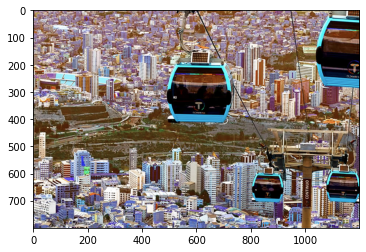

In [12]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

As you might want to download your processed images, the next cells wil help you in this attempt. 

In [13]:
# Move the image to the Drive folder
!mkdir Drive
!mv lapaz.jpg Drive/lapaz.jpg

Make zip file of your Drive folder

In [14]:
foldername = 'Drive' # your folder or filename
zipfile.ZipFile(foldername + '.zip', 'w', zipfile.ZIP_DEFLATED)

<zipfile.ZipFile filename='Drive.zip' mode='w'>

In [15]:
!ls

Drive  Drive.zip  sample_data


Downloading data from the Colab

In [ ]:
files.download('Drive.zip')

# 3. Colab's Additional Features

## 3.1 Mount your GDrive account for Storage
Since you already have a Google account with +15Gb of storage, it wouldn't be a bad idea to save your image datasets into your Gdrive accounts. Then, we will need to import these files from GDrive. 


In [17]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This will ask for an authorization code as follows: 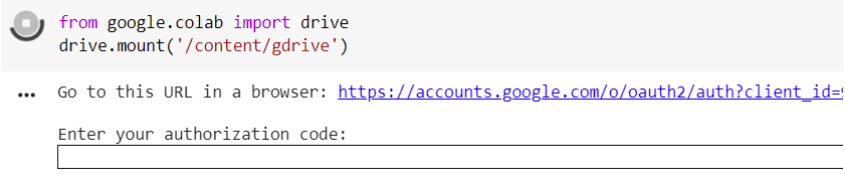

You have to access the url, copy the code, and insert it into the field. Then, you will have access to your GDrive folders from Colab. Although this code expires in a shor period, you must be careful with it as any password. 

You are now able to access your Google Drive files under:
/content/gdrive/My Drive/
Use the batch comand !cd or the “Files” panel on the left.

## 3.2 Run Bash Storage

Possibly, you already noticed that you can run bash commands (based on Unix/Linux systems) in a code cell. This is possible by starting a command with the character *!*. For example, to download a library:

!apt-get install library

Try to install your favorite library and check if its commands are available after the installation. 

## 3.3 Activate GPU and TPU
By default, Colab asigns normal CPU to every connection. However, computer vision processing is quite demanding so TPU and GPU are going to be good resources for this course. To activate them, you have to follow the next steps: 

Click on: “Runtime” → “Change runtime type” → “Hardware accelerator”. Then select the desired hardware.

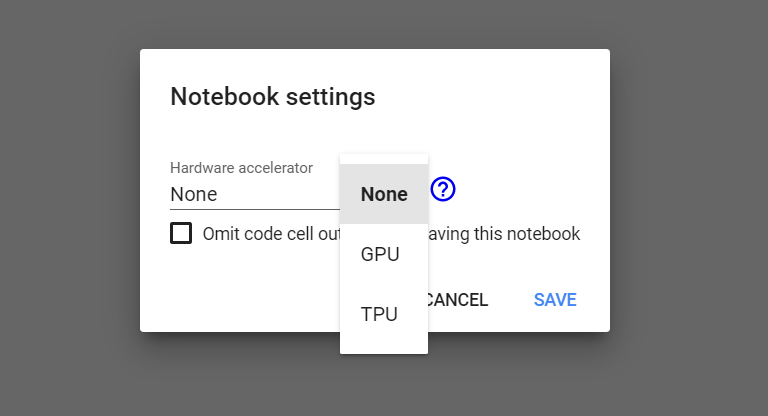



You can easily check if the GPU is enabled by executing the following code:

In [18]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Exercise 1: Images as Numerical Data
The present exercise requires you to implement the following steps with an image of your preference: 

1. Read in and display and image in gray scale. You can use the *cv2.cvtColor* function. 

2. Print the value of the pixel x=234 and y= 55.

3. Find the darkest and lightests pixels in the image.

4. Finally, you have to create a 8x8 pixels image in grayscale by creating your own  np.array. Try to be creative! Try to run the following example first: 

<code>np.array([[255, 255, 255, 255, 255],
                      [255, 70, 250, 70, 255],
                      [255, 255, 255, 255, 255],
                      [255, 70, 70, 70, 255],
                      [255, 255, 255, 255, 255]])</code>



### Solution of exercise 1

#### 1. Read in and display and image in gray scale. You can use the *cv2.cvtColor* function.

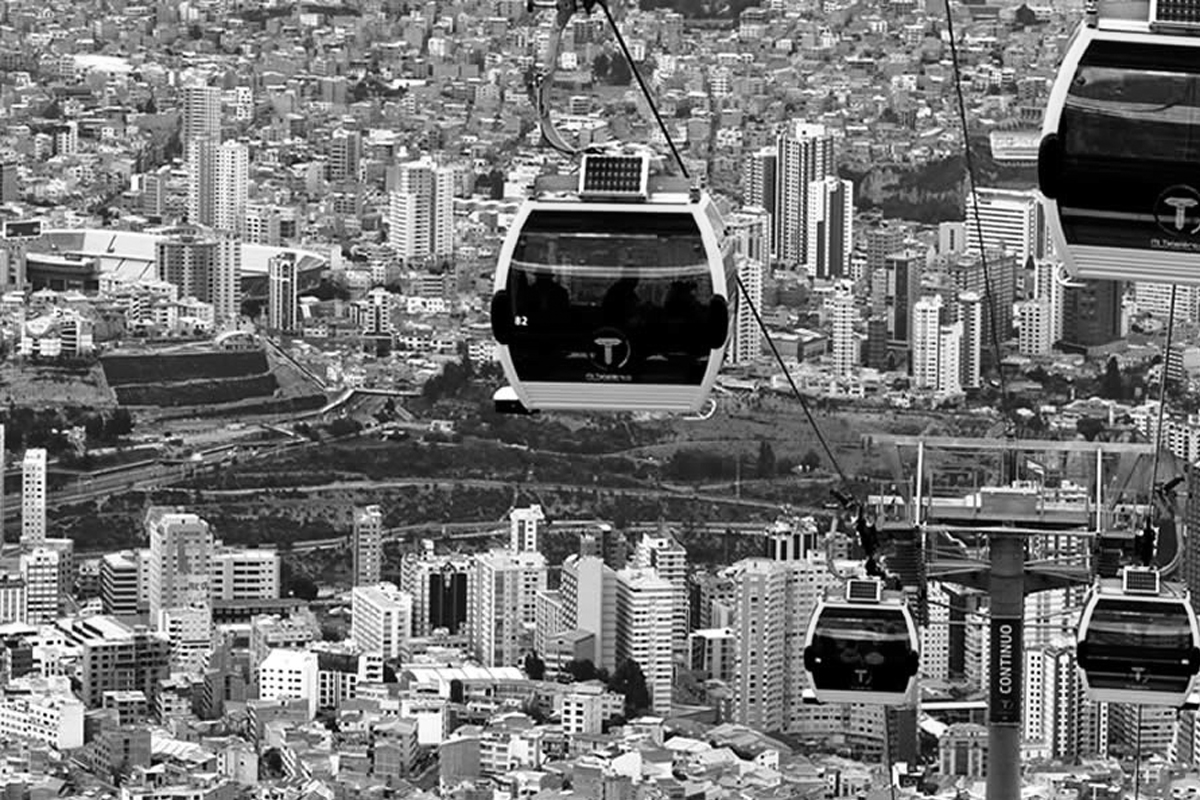

In [72]:
# to convert an image to grayscale
image = cv2.imread('lapaz.jpg', cv2.IMREAD_GRAYSCALE)
from google.colab.patches import cv2_imshow
# to show an image
cv2_imshow(image)

In [71]:
# shape of the image
image.shape

(800, 1200)

#### 2. Print the value of the pixel x=234 and y= 55.

In [60]:
pixel = image[234, 55]
print(pixel)

106


#### 3. Find the darkest and lightests pixels in the image.

In the case of this image has a lot darkest and lightest points, this can be shown in the next cell

In [80]:
# all points are the lightest
np.where(image == np.max(image))

(array([  0,   1,   2, ..., 799, 799, 799]),
 array([1154, 1154,  950, ...,  126,  140,  263]))

In [73]:
# for example we can select the first three points and printed, then the results are:
print(image[0, 1154])
print(image[1, 1154])
print(image[2, 950])

255
255
255


In [81]:
# all points are the darkest
np.where(image == np.min(image))

(array([  0,   2,   2, ..., 796, 796, 797]),
 array([594, 592, 600, ..., 266, 276, 156]))

In [82]:
# for example we can select the first three points and printed, then the results are:
print(image[0, 594])
print(image[2, 592])
print(image[2, 600])

0
0
0


#### 4. Finally, you have to create a 8x8 pixels image in grayscale by creating your own np.array. Try to be creative! Try to run the following example first:

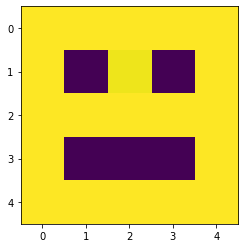

In [88]:
# example array
data = np.array([[255, 255, 255, 255, 255],
          [255, 70, 250, 70, 255],
          [255, 255, 255, 255, 255],
          [255, 70, 70, 70, 255],
          [255, 255, 255, 255, 255]])

# code to display a numpy array to an image
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

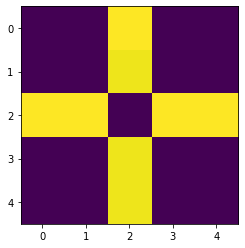

In [94]:
# exercise solution
data = np.array([[70, 70, 255, 70, 70],
          [70, 70, 250, 70, 70],
          [255, 255, 70, 255, 255],
          [70, 70, 250, 70, 70],
          [70, 70, 250, 70, 70]])

# code to display a numpy array to an image
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

# 4. Working in the RGB space

As mentioned above, images are usually saved in the RGB colour space. So, you can think of images as 3D cubes of values with width, height, and depth! To explore this idea, we will separate and visualize the channels of an image:

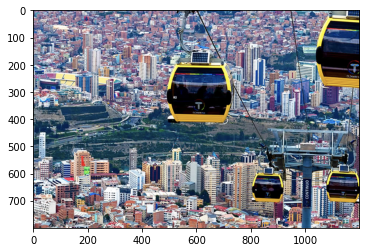

In [83]:
# Read in the image
image = mpimg.imread('lapaz.jpg')

plt.imshow(image)

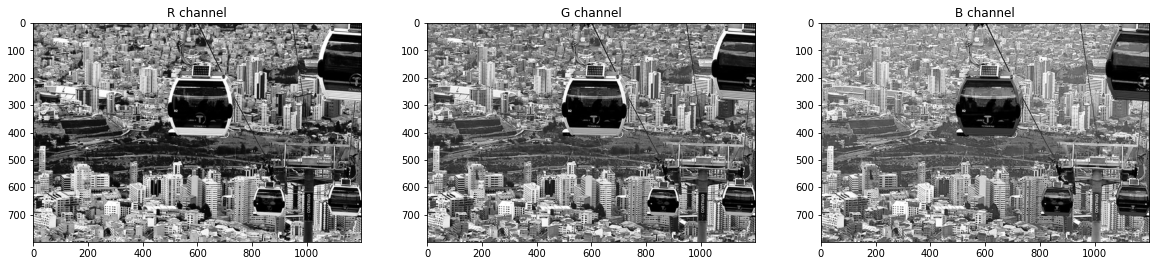

In [84]:
# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10)) 
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

## Exercise 2: Manipute an RGB image

Try to import and analize the channel differences  using an image with big sections of red, green, blue. 

Write your conlcusions after separating the channels: Which area has the lowest value for red? What about for blue?

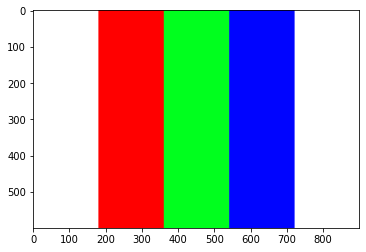

In [97]:
image_2 = mpimg.imread('rgb.png')

plt.imshow(image_2)

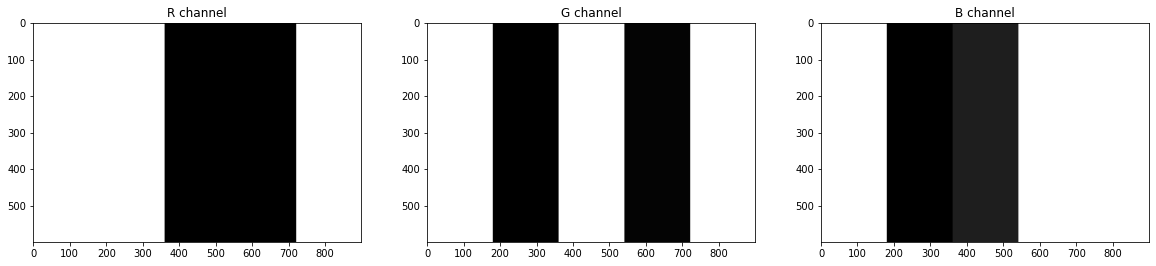

In [98]:
# Isolate RGB channels
r = image_2[:,:,0]
g = image_2[:,:,1]
b = image_2[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10)) 
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

1 blanco